<a href="https://colab.research.google.com/github/shumail1460/Machine-Learning/blob/main/DSPLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1a:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

No. of Digits after decimal points to be retained (0-9): 1
The Signal to Quantization Noise Ratio is: 28.72 dB.


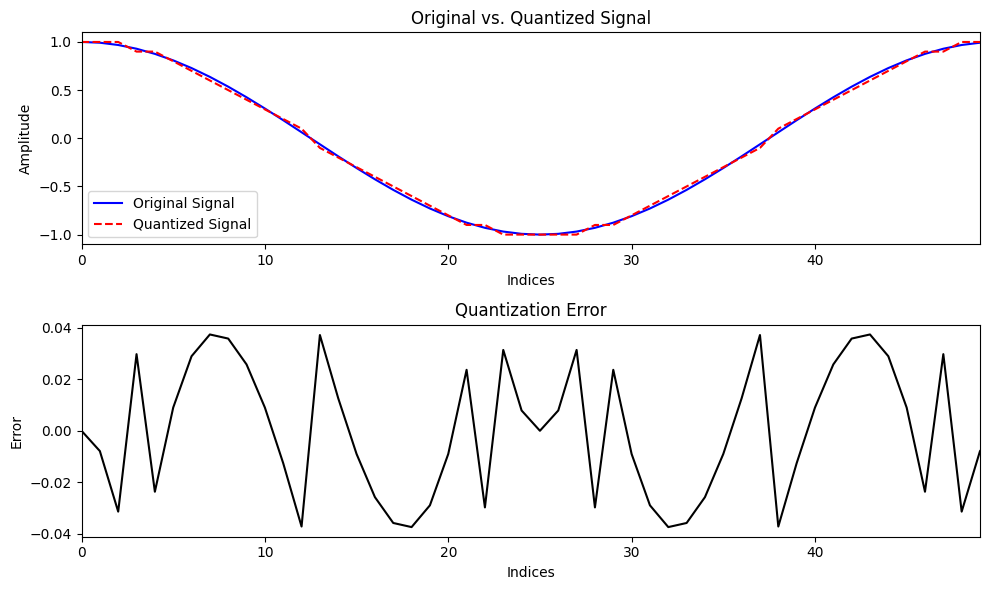

In [ ]:
fd1 = 1/50
n = np.arange(500)
x1 = np.cos(2*np.pi*fd1*n)

q = int(input('No. of Digits after decimal points to be retained (0-9): '))

x1q = np.round(x1 * 10**q) / 10**q
x1e = x1 - x1q

Px1 = np.sum(np.abs(x1)**2) / len(x1)
Pe1 = np.sum(np.abs(x1e)**2) / len(x1e)
SQNR = 10 * np.log10(Px1 / Pe1)

print(f'The Signal to Quantization Noise Ratio is: {SQNR:.2f} dB.')

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n, x1, label='Original Signal', color='blue')
plt.plot(n, x1q, label='Quantized Signal', linestyle='--', color='red')
plt.xlabel('Indices')
plt.ylabel('Amplitude')
plt.xlim(0, 49)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title('Original vs. Quantized Signal')

plt.subplot(2, 1, 2)
plt.plot(n, x1e, label='Error', color='black')
plt.xlabel('Indices')
plt.ylabel('Error')
plt.xlim(0, 49)
plt.title('Quantization Error')

plt.tight_layout()
plt.show()

# **Task 1b:**

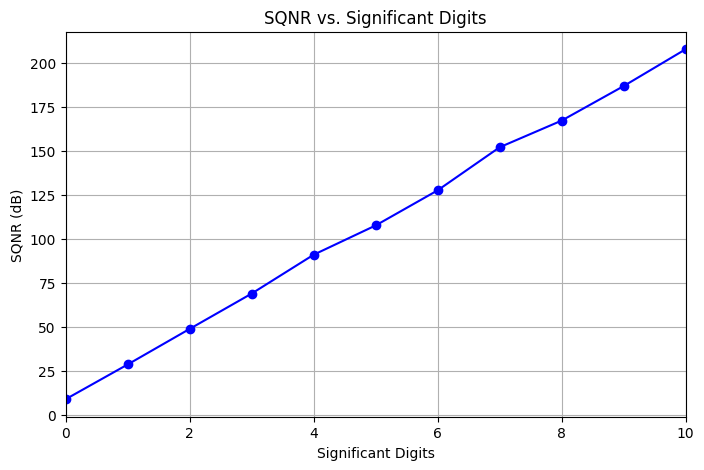

In [ ]:
fd1 = 1 / 50
n = np.arange(500)
q = np.arange(11)
SQNR = np.zeros(len(q))
for num in range(len(q)):
 x1 = np.cos(2 * np.pi * fd1 * n)
 Px1 = np.sum(np.abs(x1)**2) / len(x1)
 x1q = np.round(x1 * 10**q[num]) / 10**q[num]
 x1e = x1 - x1q
 Pe1 = np.sum(np.abs(x1e)**2) / len(x1e)
 SQNR[num] = 10 * np.log10(Px1 / Pe1)
plt.figure(figsize=(8, 5))
plt.plot(q, SQNR, marker='o', color='blue')
plt.xlabel('Significant Digits')
plt.ylabel('SQNR (dB)')
plt.title('SQNR vs. Significant Digits')
plt.xlim(q[0], q[-1])
plt.grid(True)
plt.show()

# **Task 2:**

Enter the number of digits after the decimal to retain (0-9): 1
SQNR (Round-off): 31.68 dB
SQNR (Floor): 25.60 dB
SQNR (Ceil): 27.03 dB


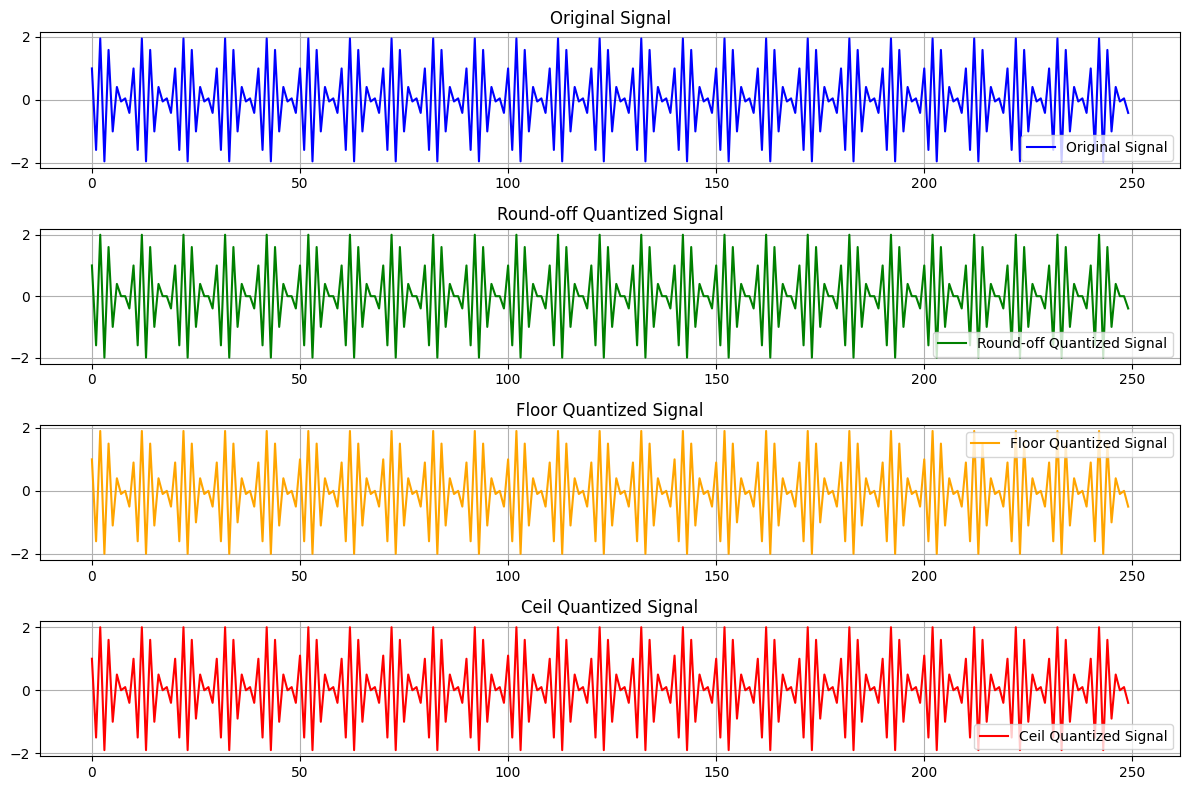

In [ ]:
fd1 = 125
fd2 = 150
N = 250
n = np.arange(N)

x = np.cos(2 * np.pi * fd1 * n / N) + np.sin(2 * np.pi * fd2 * n / N)

q = int(input("Enter the number of digits after the decimal to retain (0-9): "))

scale = 10**q

xq_round = np.round(x * scale) / scale
xq_floor = np.floor(x * scale) / scale
xq_ceil = np.ceil(x * scale) / scale

error_round = x - xq_round
error_floor = x - xq_floor
error_ceil = x - xq_ceil

Px = np.sum(x**2) / len(x)

Pe_round = np.sum(error_round**2) / len(error_round)
SQNR_round = 10 * np.log10(Px / Pe_round)

Pe_floor = np.sum(error_floor**2) / len(error_floor)
SQNR_floor = 10 * np.log10(Px / Pe_floor)

Pe_ceil = np.sum(error_ceil**2) / len(error_ceil)
SQNR_ceil = 10 * np.log10(Px / Pe_ceil)

print(f"SQNR (Round-off): {SQNR_round:.2f} dB")
print(f"SQNR (Floor): {SQNR_floor:.2f} dB")
print(f"SQNR (Ceil): {SQNR_ceil:.2f} dB")

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(n, x, label="Original Signal", color="blue")
plt.title("Original Signal")
plt.grid()
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(n, xq_round, label="Round-off Quantized Signal", color="green")
plt.title("Round-off Quantized Signal")
plt.grid()
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(n, xq_floor, label="Floor Quantized Signal", color="orange")
plt.title("Floor Quantized Signal")
plt.grid()
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(n, xq_ceil, label="Ceil Quantized Signal", color="red")
plt.title("Ceil Quantized Signal")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


# **Task 3:**

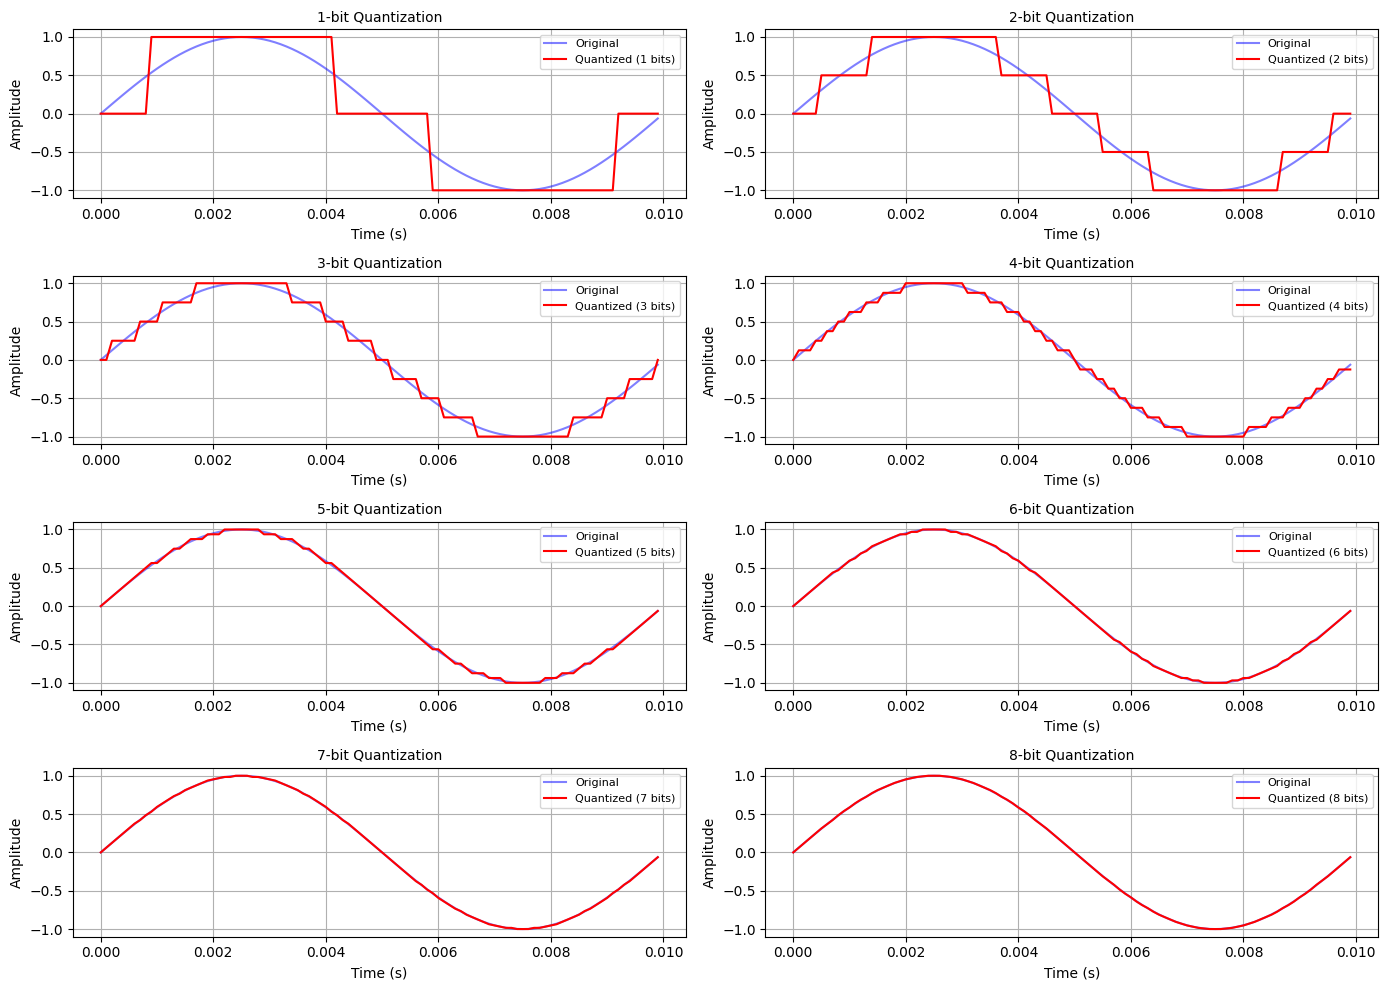

In [ ]:
frequency = 100
sampling_rate = 10000
duration = 0.01
bit_depths = [1, 2, 3, 4, 5, 6, 7, 8]

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
x = np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(14, 10))

for i, bits in enumerate(bit_depths):
    levels = 2**bits
    step_size = 2 / levels
    x_quantized = np.round(x / step_size) * step_size

    plt.subplot(4, 2, i + 1)
    plt.plot(t, x, label="Original", alpha=0.5, color='blue')
    plt.plot(t, x_quantized, label=f"Quantized ({bits} bits)", color='red')
    plt.title(f"{bits}-bit Quantization", fontsize=10)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend(fontsize=8)
    plt.grid()

plt.tight_layout()
plt.show()


# **Task 4:**

Saved: quantized_1_bits.wav
Saved: quantized_2_bits.wav
Saved: quantized_3_bits.wav
Saved: quantized_4_bits.wav
Saved: quantized_5_bits.wav
Saved: quantized_6_bits.wav


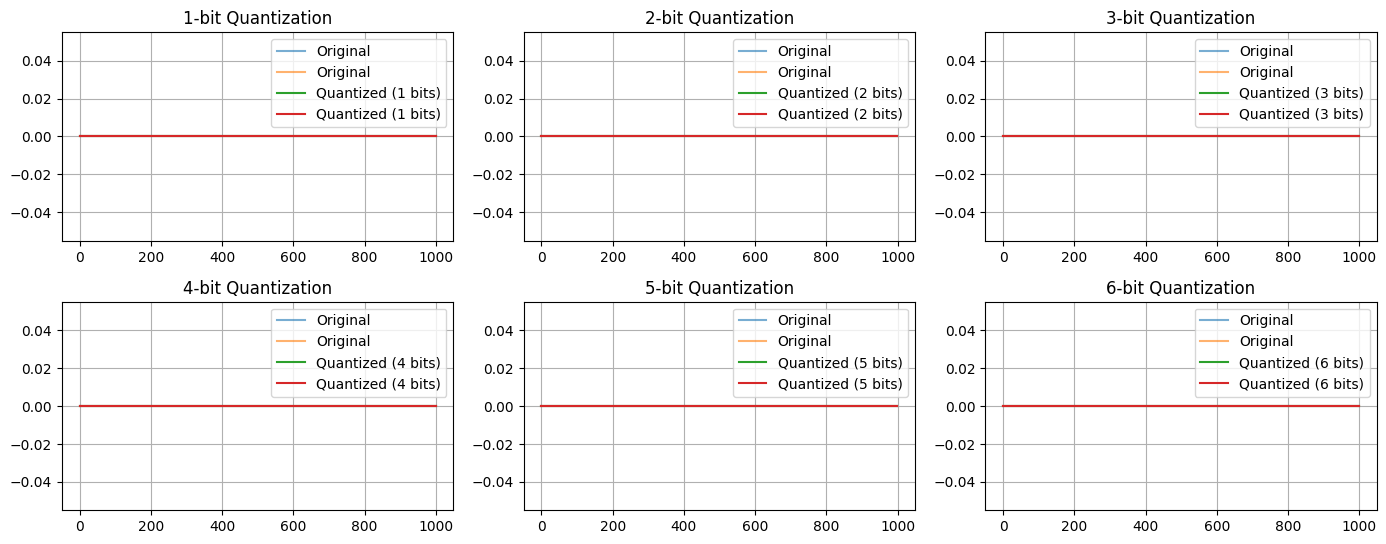

In [ ]:
file_name = "/content/WhatsApp Audio 2025-01-23 at 1.37.33 PM.mpeg"
audio, sample_rate = sf.read(file_name)
audio = audio / np.max(np.abs(audio))

def quantize_audio(audio, bit_depth):
    levels = 2**bit_depth
    step_size = 2 / levels
    quantized_audio = np.round(audio / step_size) * step_size
    quantized_audio = np.clip(quantized_audio, -1, 1)
    return quantized_audio

bit_depths = [1, 2, 3, 4, 5, 6]

for bits in bit_depths:
    quantized_audio = quantize_audio(audio, bits)
    output_file = f"quantized_{bits}_bits.wav"
    sf.write(output_file, quantized_audio, sample_rate)
    print(f"Saved: {output_file}")

plt.figure(figsize=(14, 8))

for i, bits in enumerate(bit_depths):
    quantized_audio = quantize_audio(audio, bits)
    plt.subplot(3, 3, i + 1)
    plt.plot(audio[:1000], label="Original", alpha=0.6)
    plt.plot(quantized_audio[:1000], label=f"Quantized ({bits} bits)")
    plt.title(f"{bits}-bit Quantization")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()